In [1]:
# Loading the key libraries for later analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import re

# 1. Data Importing and Understanding

In [2]:
# Read in sampled data
data = pd.read_csv('/Users/cathy/Desktop/Project1Data.csv', na_values=['–','—'," - ", " "])

In [3]:
# Return the dataframe as a matrix of i rows and j columns.
data.shape 

(47495, 39)

In [4]:
# Show the top 5 lines of the dataframe
data.head()

,Account,Campaign,Search_keyword,Headline,Headline_1,Headline_2,Expanded_text_ad_headline_3,Responsive_Search_Ad_headline_1,Responsive_Search_Ad_headline_2,Responsive_Search_Ad_headline_3,...,Start_date,End_Date,Impressions,Clicks,Cost,Avg._Cost,CTR,Conversions,Cost_/_conv.,Conv._rate
0,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),ELECTRICAL,NaN,Compare Commercial Energy.,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,191,1.0,6.08,6.08,0.0052,0.0,0.0,0.0
1,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),COMMERCIAL,NaN,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,166,1.0,11.57,11.57,0.0060,0.0,0.0,0.0
2,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),COMMERCIAL,NaN,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,171,1.0,2.59,2.59,0.0058,0.0,0.0,0.0
3,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),BUSINESS,NaN,Compare Business Energy Prices,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,18,1.0,12.70,12.70,0.0556,0.0,0.0,0.0
4,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),ELECTRICAL,NaN,Commercial Electricity Bills,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,241,2.0,17.40,8.70,0.0083,0.0,0.0,0.0


In [5]:
# Review the columns of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47495 entries, 0 to 47494
Data columns (total 39 columns):
Account                               47495 non-null object
Campaign                              47495 non-null object
Search_keyword                        47345 non-null object
Headline                              19648 non-null object
Headline_1                            47495 non-null object
Headline_2                            47495 non-null object
Expanded_text_ad_headline_3           47495 non-null object
Responsive_Search_Ad_headline_1       47495 non-null object
Responsive_Search_Ad_headline_2       47495 non-null object
Responsive_Search_Ad_headline_3       47495 non-null object
Responsive_Search_Ad_headline_4       47495 non-null object
Responsive_Search_Ad_headline_5       47495 non-null object
Responsive_Search_Ad_headline_6       47495 non-null object
Responsive_Search_Ad_headline_7       47495 non-null object
Responsive_Search_Ad_headline_8       47495 non-nul

In [6]:
# Return the sum of missing values across columns in the dataframe
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(20))
missing_data(data)

,Total,Percent
Description_line_1,27989,0.589304
Description_line_2,27989,0.589304
Display_URL,27989,0.589304
Ad,27848,0.586335
Headline,27847,0.586314
Conv._rate,202,0.004253
Conversions,202,0.004253
CTR,202,0.004253
Cost_/_conv.,202,0.004253
Search_keyword,150,0.003158


<div class="alert alert-success">
<b> Dataset Description </b>

<p> This dataset has a total of 47495 entries and 39 variables. Some of the variable names are vague and are unlikely to be useful in further analysis. Some variables, such as the headline1 need to be processed further to produce actionable intelligence, cause it contains lots of text. Finally, the number of missing values varies widely between variables (ranges from 0 to 27989). The variables with much missing value will be drop if they are not necessary for this research.</p> 

</div>

In [7]:
# Create a numerical dataframe for statistical analysis
numerical_data=data.select_dtypes(include=[np.number])

In [8]:
# Descriptive statistics of numerical variables
numerical_data.describe()
# Explain the meaning of each variables in the dissertation.

,Impressions,Clicks,Cost,Avg._Cost,CTR,Conversions,Cost_/_conv.,Conv._rate
count,4.749500e+04,47494.000000,47495.000000,47495.000000,47293.000000,47293.000000,47293.000000,47293.000000
mean,9.304247e+02,33.805281,18.503054,0.797589,0.104313,13.308883,1.093248,0.319470
std,1.163862e+04,309.306406,264.741843,1.553763,0.182476,155.989212,10.330360,0.470008
min,0.000000e+00,1.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,1.900000e+01,1.000000,0.570000,0.380000,0.020400,0.000000,0.000000,0.000000
50%,6.400000e+01,2.000000,1.240000,0.540000,0.043000,1.000000,0.160000,0.100000
75%,2.090000e+02,6.000000,3.550000,0.710000,0.100000,2.000000,1.130000,0.500000
max,1.203326e+06,19971.000000,42844.000000,65.580000,2.000000,15677.000000,839.800000,15.000000


<div class="alert alert-success">
<p>The count shows the descriptive analysis of the numerical variable, and it is handy information for future study; The mean is the average of the numerical variable. The average of clicks is 33.83, and 0.32 in conversation rate, which has the potential to improve. </p> 
    </div>

# EXPLORATORY ANALYSIS AND PLOTS

## Date variables

<div class="alert alert-success">
Start_WeekDay: Day of the week when the Ad was activated <br>
Start_month: Month when the Ad was activated<br>
Start_Day: Day of the month when the Ad was activated<br>
Start_week: Week of the year<br>

In [9]:
# Transform the date type
data['Start_date'] = pd.to_datetime(data['Start_date'])

In [10]:
# Date time features
data['start_weekday'] = data.Start_date.dt.weekday
data['start_month'] = data.Start_date.dt.month
data['start_day'] = data.Start_date.dt.day
data['start_week'] = data.Start_date.dt.week 

In [11]:
# english mapped of weekday
daymap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
data['weekday_en'] = data['start_weekday'].apply(lambda x : daymap[x])

## Search Keywords

<div class="alert alert-success">
Calculate the number of the search keywords.

In [12]:
# Len of the keywords
data['Search_keyword'] = data['Search_keyword'].fillna(" ")
data['Search_keyword_len'] = data['Search_keyword'].apply(lambda x : len(x.split()))

In [13]:
# Whether the search keywords include the company name

# ['My Energy Comparison - MIC', 'Novi.Digital',
#       'My Energy Comparison - LES', 'Insuro'] 

keywords_including=[]
for i in range(len(data)):
    if "-" in str(data.iloc[i, 0]):
        ls = str(data.iloc[i,0]).lower().split(" - ")
        if (ls[0] in str(data.iloc[i,2]).lower()) or (ls[1] in str(data.iloc[i,2]).lower() or "energy" in str(data.iloc[i,2]).lower()):
            keywords_including.append(str(data.iloc[i,2]).lower())
        else:
            keywords_including.append("nan")
    elif "." in str(data.iloc[i, 0]):
        ls = str(data.iloc[i,0]).lower().split(".")
        if (ls[0] in str(data.iloc[i,2]).lower() or ls[1] in str(data.iloc[i,2]).lower() or "digital" in str(data.iloc[i,2]).lower()):
            keywords_including.append(str(data.iloc[i,2]).lower())
        else:
            keywords_including.append("nan")
    else:
        if (str(data.iloc[i,0]).lower() in str(data.iloc[i,2]).lower()):
            keywords_including.append(str(data.iloc[i,2]).lower())
        else:
            keywords_including.append("nan")
          

In [14]:
# If the keywords have the company name would be 1, otherwise 0
incluing_keywords=[]
for i in keywords_including:
    if i == "nan":
        incluing_keywords.append(0)
    else:
        incluing_keywords.append(1)
    

In [15]:
# Storage the information to a new column
incluing_keywords_df=pd.DataFrame(incluing_keywords)
data["keywords_with_company"]=incluing_keywords_df

In [16]:
data["keywords_with_company"].value_counts()

0    46674
1      821
Name: keywords_with_company, dtype: int64

In [17]:
# Whether have number in the search keywords
number_in_search_keyword=[]
for i in data["Search_keyword"]:
    number_in_search_keyword.append(bool(re.search(r'd', str(i))))

In [18]:
# Transfer it to dataframe
number_in_search_keyword_df=pd.DataFrame(number_in_search_keyword)

In [19]:
# Save it in the dataset 
data["number_in_search_keyword"]=number_in_search_keyword_df

In [20]:
data["number_in_search_keyword"].value_counts()

False    37313
True     10182
Name: number_in_search_keyword, dtype: int64

In [21]:
# Build a calling to action words list reference to  
CTA=["get","start","sign","create","account","view","book","contact","learn","join","shop","explore","discovre",
    "off","add","new","buy","now","schedule","enter","try","join","%","$","free","save","stop","purchase"]

In [22]:
# Whether have calling to action words in the search keywords
cta_keywords=[]
for i in data["Search_keyword"]:
    for j in CTA:
        if j in str(i).lower():
            cta_keywords.append(1)
        else:
            cta_keywords.append(0)

In [23]:
# Transfer it to dataframe
CTA_in_search_keyword_df=pd.DataFrame(cta_keywords)

In [24]:
# Save it in the dataset 
data["cta_in_search_keyword"]=CTA_in_search_keyword_df

In [25]:
# Whether have the interrogative in the search keywords, such as who,what.
interrogative_words=["who","what","how","why","when","which"]
interrogative_keywords=[]
for i in data["Search_keyword"]:
    for j in interrogative_words:
        if j in str(i).lower():
            interrogative_keywords.append(1)
        else:
            interrogative_keywords.append(0)


In [26]:
# Transfer it to dataframe
interrogative_in_search_keyword_df=pd.DataFrame(interrogative_keywords)

In [27]:
# Save it in the dataset 
data["interrogative_in_search_keyword"]=interrogative_in_search_keyword_df

## Headline

<div class="alert alert-success">
Combine all the headline variables and Responsive headline, then calculate the length.

In [28]:
# headline combined
data['headline_combined'] = data.apply(lambda row: ' '.join([str(row['Headline']), 
                                                                 str(row['Headline_1']), 
                                                                 str(row['Expanded_text_ad_headline_3']), 
                                                                     str(row['Headline_2'])]), axis=1)

In [29]:
# Responsive combined
data['Responsive_headline_combined']=data.apply(lambda row: ' '.join([ str(row['Responsive_Search_Ad_headline_1']),
                                                            str(row['Responsive_Search_Ad_headline_2']),str(row['Responsive_Search_Ad_headline_3']),
                                                            str(row['Responsive_Search_Ad_headline_4']),str(row['Responsive_Search_Ad_headline_5']),
                                                            str(row['Responsive_Search_Ad_headline_6']),str(row['Responsive_Search_Ad_headline_7']),
                                                            str(row['Responsive_Search_Ad_headline_8']),str(row['Responsive_Search_Ad_headline_9'])]), axis=1)

In [30]:
# Combine all of the headline
data['headline_all_combined']=data.apply(lambda row: ' '.join([str(row['headline_combined']),str(row['Responsive_headline_combined'])]), axis=1)

In [31]:
# count the length
data['headline_all_combined'] = data['headline_all_combined'].fillna(" ")
data['headline_all_combined_len'] = data['headline_all_combined'].apply(lambda x : len(x.split()))

In [32]:
# Whether the healine include the company name

headline_including=[]
for i in range(len(data)):
    if "-" in str(data.iloc[i, 0]):
        ls = str(data.iloc[i,0]).lower().split(" - ")
        if (ls[0] in str(data.loc[i,'headline_all_combined']).lower()) or (ls[1] in str(data.loc[i,'headline_all_combined']).lower() or "energy" in str(data.loc[i,'headline_all_combined']).lower()):
            headline_including.append(str(data.iloc[i,2]).lower())
        else:
            headline_including.append("nan")
    elif "." in str(data.iloc[i, 0]):
        ls = str(data.iloc[i,0]).lower().split(".")
        if (ls[0] in str(data.loc[i,'headline_all_combined']).lower() or ls[1] in str(data.loc[i,'headline_all_combined']).lower() or "digital" in str(data.loc[i,'headline_all_combined']).lower()):
            headline_including.append(str(data.loc[i,'headline_all_combined']).lower())
        else:
            headline_including.append("nan")
    else:
        if (str(data.iloc[i,0]).lower() in str(data.loc[i,'headline_all_combined']).lower()):
            headline_including.append(str(data.loc[i,'headline_all_combined']).lower())
        else:
            headline_including.append("nan")



In [33]:
# If the headline have the company name would be 1, otherwise 0
headline_including_dummy=[]
for i in headline_including:
    if i == "nan":
        headline_including_dummy.append(0)
    else:
        headline_including_dummy.append(1)

In [34]:
# Storage the information to a new column
headline_including_dummy_df=pd.DataFrame(headline_including_dummy)
data["headline_with_company"]=headline_including_dummy_df

In [35]:
data["headline_with_company"].value_counts()

0    39790
1     7705
Name: headline_with_company, dtype: int64

In [36]:
# Count the times of keywords showing in the headline
num_list=[]
for i in range(len(data)):
    a=str(data.loc[i,'headline_all_combined']).lower().count(str(data.loc[i,'Search_keyword']).lower())
    num_list.append(a)

In [37]:
# create a dataframe to stroage the information
num_df=pd.DataFrame(num_list)
data["headline_with_keywords_times"]=num_df

In [38]:
data["headline_with_keywords_times"].value_counts()

0     45097
1      2118
2       121
19       70
20       63
17        7
4         4
3         3
39        2
10        1
9         1
28        1
42        1
24        1
16        1
48        1
18        1
22        1
47        1
Name: headline_with_keywords_times, dtype: int64

In [39]:
# Whether have number in the headline
number_in_headline=[]
for i in data["headline_all_combined"]:
    number_in_headline.append(bool(re.search(r'd', str(i))))

In [40]:
# Transfer it to dataframe
number_in_headline_df=pd.DataFrame(number_in_headline)

In [41]:
# Save it to orginal dataset
data["number_in_headline"]=number_in_headline_df

In [42]:
# Whether have calling to action words in the headline
cta_headline=[]
for i in data["headline_all_combined"]:
    for j in CTA:
        if j in str(i).lower():
            cta_headline.append(1)
        else:
            cta_headline.append(0)

In [43]:
# Transfer it to dataframe
cta_in_headline_df=pd.DataFrame(cta_headline)

In [44]:
# Save it to orginal dataset
data["cta_in_headline"]=cta_in_headline_df

In [45]:
# Whether have the interrogative in the headline.
interrogative_headline=[]
for i in data["headline_all_combined"]:
    for j in interrogative_words:
        if j in str(i).lower():
            interrogative_headline.append(1)
        else:
            interrogative_headline.append(0)


In [46]:
# Transfer it to dataframe
interrogative_in_headline_df=pd.DataFrame(interrogative_headline)

In [47]:
# Save it to orginal dataset
data["interrogative_in_headline"]=interrogative_in_headline_df

## Desciption

<div class="alert alert-success">
Combine all the description variables and Responsive description, then calculate the length.

In [48]:
# Responsive combined
data['Responsive_description_combined']=data.apply(lambda row: ' '.join([ 
                                                            str(row['Responsive_Search_Ad_description_1']),str(row['Responsive_Search_Ad_description_2']),
                                                            str(row['Responsive_Search_Ad_description_3']),str(row['Responsive_Search_Ad_description_4'])]), axis=1)

In [49]:
# Description combined
data['description_combined']=data.apply(lambda row: ' '.join([ 
                                                            str(row['Description']),str(row['Expanded_text_ad_description_2']),
                                                            str(row['Description_line_1']),str(row['Description_line_2'])]), axis=1)

In [50]:
# All The Description combined
data['description_all_combined']=data.apply(lambda row: ' '.join([str(row['Responsive_description_combined']),str(row['description_combined'])]), axis=1)

In [51]:
# Calculate the len of description
data['description_all_combined'] = data['description_all_combined'].fillna(" ")
data['description_all_combined_len'] = data['description_all_combined'].apply(lambda x : len(x.split()))

In [52]:
# How many times the keywords showing in the description 
num_desc_list=[]
for i in range(len(data)):
    a=str(data.loc[i,'description_all_combined']).lower().count(str(data.loc[i,'Search_keyword']).lower())
    num_desc_list.append(a)

In [53]:
num_desc_df=pd.DataFrame(num_desc_list)
data["desciption_with_keywords_times"]=num_desc_df

In [54]:
data["desciption_with_keywords_times"].value_counts()

0     46133
1      1088
2       114
19       79
33       41
20        9
17        8
34        7
4         4
3         2
18        2
47        2
26        1
5         1
10        1
46        1
16        1
8         1
Name: desciption_with_keywords_times, dtype: int64

In [55]:
# Whether the description include the company name

description_including=[]
for i in range(len(data)):
    if "-" in str(data.iloc[i, 0]):
        ls = str(data.iloc[i,0]).lower().split(" - ")
        if (ls[0] in str(data.loc[i,'description_all_combined']).lower()) or (ls[1] in str(data.loc[i,'description_all_combined']).lower() or "energy" in str(data.loc[i,'description_all_combined']).lower()):
            description_including.append(str(data.iloc[i,2]).lower())
        else:
            description_including.append("nan")
    elif "." in str(data.iloc[i, 0]):
        ls = str(data.iloc[i,0]).lower().split(".")
        if (ls[0] in str(data.loc[i,'description_all_combined']).lower() or ls[1] in str(data.loc[i,'description_all_combined']).lower() or "digital" in str(data.loc[i,'description_all_combined']).lower()):
            description_including.append(str(data.loc[i,'headline_all_combined']).lower())
        else:
            description_including.append("nan")
    else:
        if (str(data.iloc[i,0]).lower() in str(data.loc[i,'description_all_combined']).lower()):
            description_including.append(str(data.loc[i,'description_all_combined']).lower())
        else:
            description_including.append("nan")


In [56]:
# If the description have the company name would be 1, otherwise 0
description_including_dummy=[]
for i in description_including:
    if i == "nan":
        description_including_dummy.append(0)
    else:
        description_including_dummy.append(1)

In [57]:
# Storage the information to a new column
description_including_dummy_df=pd.DataFrame(description_including_dummy)
data["description_with_company"]=description_including_dummy_df

In [58]:
data["description_with_company"].value_counts()

0    41323
1     6172
Name: description_with_company, dtype: int64

In [59]:
# Whether have number in the description
number_in_description=[]
for i in data["description_all_combined"]:
    number_in_description.append(bool(re.search(r'd', str(i))))

In [60]:
# Transfer it to dataframe
number_in_description_df=pd.DataFrame(number_in_description)

In [61]:
# Save it to orginal dataset
data["number_in_description"]=number_in_description_df

In [62]:
# Whether have calling to action words in the description
cta_description=[]
for i in data["description_all_combined"]:
    for j in CTA:
        if j in str(i).lower():
            cta_description.append(1)
        else:
            cta_description.append(0)

In [63]:
# Transfer it to dataframe
CTA_in_description_df=pd.DataFrame(cta_description)

In [64]:
# Save it to orginal dataset
data["CTA_in_description"]=CTA_in_description_df

In [65]:
# Whether have the interrogative in the description.
interrogative_description=[]
for i in data["description_all_combined"]:
    for j in interrogative_words:
        if j in str(i).lower():
            interrogative_description.append(1)
        else:
            interrogative_description.append(0)


In [66]:
# Transfer it to dataframe
interrogative_in_description_df=pd.DataFrame(interrogative_description)

In [67]:
# Save it to orginal dataset
data["interrogative_in_description"]=interrogative_in_description_df

In [68]:
# drop the description information from the dataset
# Cause the description column includes the text, which cannot be recognise in the modelling.
data = data.drop(columns=["Responsive_description_combined","Responsive_Search_Ad_description_1",
                          "Responsive_Search_Ad_description_2","Responsive_Search_Ad_description_3",
                          "description_combined","Description","Expanded_text_ad_description_2",
                          "Description_line_1","Description_line_2","description_all_combined"])
                          

In [69]:
# drop the keywords column which include the text
data = data.drop(columns=["Search_keyword"])

In [70]:
# drop the description information from the dataset
# Cause the description column includes the text, which cannot be recognise in the modelling.
data = data.drop(columns=["headline_combined","Headline","Headline_1","Expanded_text_ad_headline_3",
                          "Headline_2","Responsive_Search_Ad_headline_1","Responsive_headline_combined",
                          "Responsive_Search_Ad_headline_2","Responsive_Search_Ad_headline_3",
                          "Responsive_Search_Ad_headline_4","Responsive_Search_Ad_headline_5",
                          "Responsive_Search_Ad_headline_6","Responsive_Search_Ad_headline_7",
                         "Responsive_Search_Ad_headline_8","Responsive_Search_Ad_headline_9",
                         "headline_all_combined"])
                          

## Conversions

In [71]:
data = data.dropna(subset=["Conversions"])

In [72]:
# Define whether click
data["success_Conversions"]= [0 if i==0 else 1 for i in data["Conversions"]]

In [73]:
data["success_Conversions"].value_counts()

1    23860
0    23433
Name: success_Conversions, dtype: int64

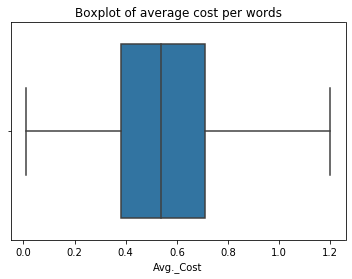

In [74]:
# Box plot for avg.cost
sns.boxplot(x='Avg._Cost', data=data, showfliers=False) # showfliers excludes outliers
plt.ticklabel_format(axis='x')
plt.title('Boxplot of average cost per words')
plt.show()

<div class="alert alert-success">
The boxplot shows the distribution of the price of a keyword. The reason why here include 0 is that the fee will be costed by click; if nobody clicks the web through these keywords, it will not cost any fee. What is more, the most expensive word worth 1.2, it suppose to have the highest conversing rate because of the highest price.

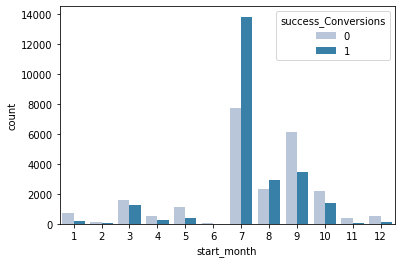

In [75]:
# The successful conversion in each start month
sns.countplot(x="start_month", hue="success_Conversions", data=data, palette="PuBu") 

<div class="alert alert-success">
    Based on the above plot, it is easy to find the search ads beagin at July had more conversion suceess cases. In other words, publish the search ads at July will have higher possibility to success.

In [76]:
# Create the dummy variableas for the start month
data = pd.get_dummies(data, columns=['start_month'], prefix='start_month', drop_first=True)
# The first one is the base.

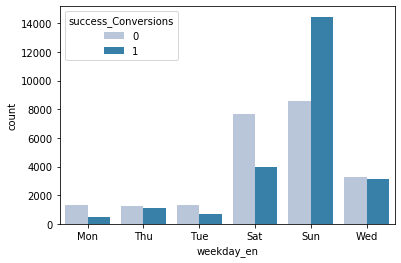

In [77]:
# The number of successful converssing each start weekday
sns.countplot(x="weekday_en", hue="success_Conversions", data=data, palette="PuBu") 

<div class="alert alert-success">
On the face of it, the start day at Sunday will have a better-conversing performance.

In [78]:
# Create the dummy variableas for the start month
data = pd.get_dummies(data, columns=['weekday_en'], prefix='weekday_en', drop_first=True)
# The first one is the base.

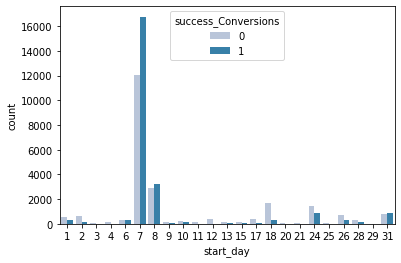

In [79]:
# The number of successful conversion in each day weekday
sns.countplot(x="start_day", hue="success_Conversions", data=data, palette="PuBu") 

<div class="alert alert-success">
On the face of it, the start day at 7th per month will have a better-conversing performance.

In [80]:
# Using the PCA method to reduce the region code demension
start_day_data = data.groupby(['Campaign', 'start_day'])['Campaign'].value_counts().unstack('start_day')
start_day_data.fillna(0, inplace=True)
start_day_data.dropna()

,start_day,1,2,3,4,6,7,8,9,10,11,...,17,18,20,21,24,25,26,28,29,31
Campaign,Campaign,,,,,,,,,,,,,,,,,,,,,
4x4 Insurance,4x4 Insurance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
4x4 Insurance - Broad,4x4 Insurance - Broad,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4x4 Insurance - Exact,4x4 Insurance - Exact,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4x4 Insurance - Phrase,4x4 Insurance - Phrase,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bike Insurance,Bike Insurance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,574.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novi.digital - SEO - Generic - Region Targeted,novi.digital - SEO - Generic - Region Targeted,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
novi.digital - SEO - Region Keyword Targeted,novi.digital - SEO - Region Keyword Targeted,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
novi.digital - Search Engine Marketing - Generic - National,novi.digital - Search Engine Marketing - Generic - National,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Set the dataset for preparing
start_day_data.reset_index(level=0, inplace=True)

# Storage the artist name
start_day_data_name=pd.DataFrame(start_day_data['Campaign'])

# Before doing the standardized, drop the category 
start_day_data=start_day_data.drop(['Campaign'], axis=1)

In [82]:
# Standardized the start_day
from sklearn import preprocessing
start_day_data_scaled = pd.DataFrame(preprocessing.scale(start_day_data))
start_day_data_scaled

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.108611,-0.141037,-0.059736,-0.094532,-0.062527,-0.130904,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,0.211295,-0.056254,-0.056254,-0.056972
1,-0.108611,-0.141037,-0.059736,-0.094532,-0.062527,-0.116503,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972
2,-0.108611,-0.141037,-0.059736,-0.094532,-0.062527,-0.109303,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972
3,-0.108611,-0.141037,-0.059736,-0.094532,-0.062527,-0.123704,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972
4,-0.108611,-0.141037,-0.059736,-0.094532,-0.062527,-0.130904,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,12.102366,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.971207,-0.141037,-0.059736,-0.094532,-0.062527,-0.130904,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972
313,6.661013,-0.141037,-0.059736,-0.094532,-0.062527,-0.130904,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972
314,-0.108611,-0.141037,-0.059736,-0.094532,-0.062527,-0.130904,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972
315,-0.108611,-0.141037,-0.059736,-0.094532,-0.062527,-0.130904,-0.101391,-0.061040,-0.066632,-0.101737,...,-0.078598,-0.133006,-0.084496,-0.096738,-0.056254,-0.088772,-0.275835,-0.056254,-0.056254,-0.056972


In [83]:
# Doing demension reduction 
from sklearn.decomposition import PCA
k = 10
pca_model = PCA(n_components=k, svd_solver='auto')
start_day_pca = pca_model.fit_transform(start_day_data_scaled)

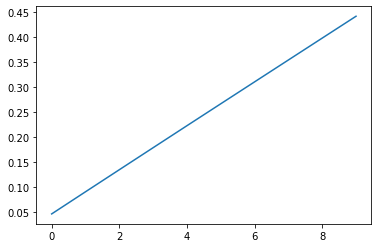

In [84]:
# Plot the explainability power
var_exp_cumsum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(var_exp_cumsum)

In [85]:
# Create the dateframe for date pca
df_pca_model = pd.DataFrame(pca_model.explained_variance_ratio_,index=[1,2,3,4,5,6,7,8,9,10])
df_date_data_pca = pd.DataFrame(start_day_pca)
df_date_data_pca.columns=['Day_PCA1','Day_PCA2','Day_PCA3','Day_PCA4','Day_PCA5','Day_PCA6','Day_PCA7','Day_PCA8','Day_PCA9','Day_PCA10']
df_date_data_pca

,Day_PCA1,Day_PCA2,Day_PCA3,Day_PCA4,Day_PCA5,Day_PCA6,Day_PCA7,Day_PCA8,Day_PCA9,Day_PCA10
0,0.360164,0.018909,0.005508,-0.109850,-0.056482,-0.003044,-0.000133,-0.001051,0.000417,0.000468
1,-0.060082,-0.010135,-0.010351,-0.001689,-0.002584,-0.002065,-0.000161,-0.001735,0.000972,0.001436
2,-0.061357,-0.012018,-0.015007,-0.004671,0.000650,-0.001443,-0.000120,-0.001305,0.000722,0.000391
3,-0.058808,-0.008252,-0.005694,0.001292,-0.005817,-0.002687,-0.000203,-0.002164,0.001222,0.002481
4,-2.252366,-3.528009,9.236005,-3.721669,4.449743,0.849081,0.053595,0.528259,-0.277933,-0.593411
...,...,...,...,...,...,...,...,...,...,...
312,-0.196504,-0.090896,-0.022334,0.128713,-0.418757,0.912739,0.019085,0.145413,-0.062937,-0.107662
313,-0.928774,-0.536283,-0.134552,0.784413,-2.577594,5.739610,0.120932,0.925294,-0.402322,-0.693540
314,-0.148002,0.365042,0.014091,-0.040129,0.066452,0.016220,0.001062,0.010618,-0.005655,-0.012241
315,-0.781288,2.964924,0.119990,-0.350945,0.594972,0.152927,0.010203,0.103097,-0.055546,-0.122617


In [86]:
# Merge the pca dataframe with the campaign name
start_day_data_name=start_day_data_name.reset_index(drop=True)
df_date_data_pca=pd.concat([start_day_data_name,df_date_data_pca],axis=1)
df_date_data_pca

,Campaign,Day_PCA1,Day_PCA2,Day_PCA3,Day_PCA4,Day_PCA5,Day_PCA6,Day_PCA7,Day_PCA8,Day_PCA9,Day_PCA10
0,4x4 Insurance,0.360164,0.018909,0.005508,-0.109850,-0.056482,-0.003044,-0.000133,-0.001051,0.000417,0.000468
1,4x4 Insurance - Broad,-0.060082,-0.010135,-0.010351,-0.001689,-0.002584,-0.002065,-0.000161,-0.001735,0.000972,0.001436
2,4x4 Insurance - Exact,-0.061357,-0.012018,-0.015007,-0.004671,0.000650,-0.001443,-0.000120,-0.001305,0.000722,0.000391
3,4x4 Insurance - Phrase,-0.058808,-0.008252,-0.005694,0.001292,-0.005817,-0.002687,-0.000203,-0.002164,0.001222,0.002481
4,Bike Insurance,-2.252366,-3.528009,9.236005,-3.721669,4.449743,0.849081,0.053595,0.528259,-0.277933,-0.593411
...,...,...,...,...,...,...,...,...,...,...,...
312,novi.digital - SEO - Generic - Region Targeted,-0.196504,-0.090896,-0.022334,0.128713,-0.418757,0.912739,0.019085,0.145413,-0.062937,-0.107662
313,novi.digital - SEO - Region Keyword Targeted,-0.928774,-0.536283,-0.134552,0.784413,-2.577594,5.739610,0.120932,0.925294,-0.402322,-0.693540
314,novi.digital - Search Engine Marketing - Gener...,-0.148002,0.365042,0.014091,-0.040129,0.066452,0.016220,0.001062,0.010618,-0.005655,-0.012241
315,novi.digital - Search Engine Optimisation - Ge...,-0.781288,2.964924,0.119990,-0.350945,0.594972,0.152927,0.010203,0.103097,-0.055546,-0.122617


In [87]:
# Merge the result to the dataset.
data=pd.merge(data,df_date_data_pca,on='Campaign') 
data

,Account,Campaign,Responsive_Search_Ad_description_4,Display_URL,Ad,Path_1,Path_2,Search_keyword_match_type,Start_date,End_Date,...,Day_PCA1,Day_PCA2,Day_PCA3,Day_PCA4,Day_PCA5,Day_PCA6,Day_PCA7,Day_PCA8,Day_PCA9,Day_PCA10
0,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,commercial,energy,Broad,2019-02-26,--,...,1.760639,0.099327,0.025606,-0.445870,-0.185408,0.000849,0.000415,0.005824,-0.003995,-0.011601
1,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,commercial,electricity,Broad,2019-02-26,--,...,1.760639,0.099327,0.025606,-0.445870,-0.185408,0.000849,0.000415,0.005824,-0.003995,-0.011601
2,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,commercial,electricity,Broad,2019-02-26,--,...,1.760639,0.099327,0.025606,-0.445870,-0.185408,0.000849,0.000415,0.005824,-0.003995,-0.011601
3,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,business-energy,switch,Broad,2019-02-26,--,...,1.760639,0.099327,0.025606,-0.445870,-0.185408,0.000849,0.000415,0.005824,-0.003995,-0.011601
4,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,business,gas-&-electric,Broad,2019-02-26,--,...,1.760639,0.099327,0.025606,-0.445870,-0.185408,0.000849,0.000415,0.005824,-0.003995,-0.011601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47288,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.059985,-0.007683,-0.001343,0.005919,-0.013754,-0.009774,-0.014836,0.007681,-0.001225,0.000111
47289,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.059985,-0.007683,-0.001343,0.005919,-0.013754,-0.009774,-0.014836,0.007681,-0.001225,0.000111
47290,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.059985,-0.007683,-0.001343,0.005919,-0.013754,-0.009774,-0.014836,0.007681,-0.001225,0.000111
47291,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.059985,-0.007683,-0.001343,0.005919,-0.013754,-0.009774,-0.014836,0.007681,-0.001225,0.000111


In [88]:
# drop the path information from the dataset
# Cause the description column includes the text, which cannot be recognise in the modelling.
data = data.drop(columns=["start_day"])

## Keywords length and conversions 

In [89]:
data["success_Conversions"]

0        0
1        0
2        0
3        0
4        0
        ..
47288    0
47289    0
47290    0
47291    1
47292    0
Name: success_Conversions, Length: 47293, dtype: int64

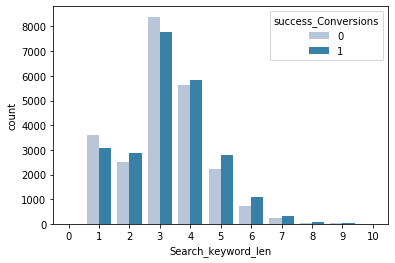

In [90]:
# The length of keywords with conversions
sns.countplot(x="Search_keyword_len", hue="success_Conversions", data=data, palette="PuBu") 

<div class="alert alert-success">
According to the above plot, the most popular length of keywords is 3 and 4 characters. What is more, the previous data shows the keywords with 4 characters will have a higher successful conversing possibility compare to the three and one characters.

In [91]:
data_success = data[data['success_Conversions']==1]

In [92]:
data_success['success_Conversions'].value_counts()

1    23860
Name: success_Conversions, dtype: int64

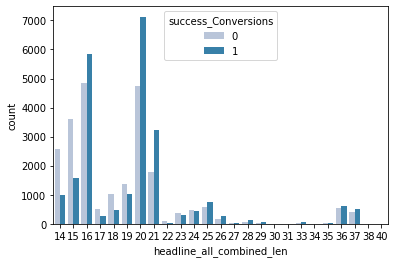

In [93]:
# The length of keywords with conversions
sns.countplot(x="headline_all_combined_len", hue="success_Conversions", data=data, palette="PuBu") 

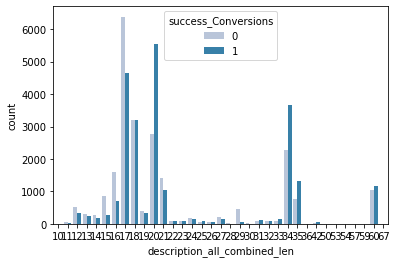

In [94]:
# The length of keywords with conversions
sns.countplot(x="description_all_combined_len", hue="success_Conversions", data=data, palette="PuBu") 

## Path 1/ Path 2

In [95]:
# Combine the path 1 and path 2
data['Path_combined'] = data.apply(lambda row: ' '.join([str(row['Path_1']), 
                                                                 str(row['Path_2'])]), axis=1)

In [96]:
data['Path_combined'].value_counts()

-- --                        23027
Car Insurance                12958
car insurance                 2192
insurance car                 1982
Van Insurance                  686
                             ...  
Marketing Business Online        1
seo Packages                     1
Marketing Online Agency          1
Marketing Online Expert          1
SEO Leyland                      1
Name: Path_combined, Length: 255, dtype: int64

In [97]:
#Demension reduction
Path_combined_data = data.groupby(['Campaign', 'Path_combined'])['Campaign'].value_counts().unstack('Path_combined')
Path_combined_data.fillna(0, inplace=True)
Path_combined_data.dropna()

,Path_combined,-- --,4x4 Insurance,4x4 insurance,Adwords Agency,Adwords PPC,Adwords Support,Auto Insurance,Backlink Removal,Barge Insurance,Bike Insurance,...,seo course,seo kendal,seo manchester,seo preston,seo service,seo services,services seo,theoneandonly insuro,transit Insurance,van insurance
Campaign,Campaign,,,,,,,,,,,,,,,,,,,,,
4x4 Insurance,4x4 Insurance,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4x4 Insurance - Broad,4x4 Insurance - Broad,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4x4 Insurance - Exact,4x4 Insurance - Exact,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4x4 Insurance - Phrase,4x4 Insurance - Phrase,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bike Insurance,Bike Insurance,574.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novi.digital - SEO - Generic - Region Targeted,novi.digital - SEO - Generic - Region Targeted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
novi.digital - SEO - Region Keyword Targeted,novi.digital - SEO - Region Keyword Targeted,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0
novi.digital - Search Engine Marketing - Generic - National,novi.digital - Search Engine Marketing - Generic - National,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# Set the dataset for preparing
Path_combined_data.reset_index(level=0, inplace=True)

# Storage the artist name
Path_combined_data_name=pd.DataFrame(Path_combined_data['Campaign'])

# Before doing the standardized, drop the category 
Path_combined_data=Path_combined_data.drop(['Campaign'], axis=1)

In [99]:
# Standardized the region code
from sklearn import preprocessing
Path_combined_data_scaled = pd.DataFrame(preprocessing.scale(Path_combined_data))
Path_combined_data_scaled

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,-0.225435,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,-0.056254,-0.079682,-0.056254,-0.056254,-0.056254,-0.071224,-0.075569,-0.077288,-0.056254
1,-0.211904,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,-0.056254,-0.079682,-0.056254,-0.056254,-0.056254,-0.071224,-0.075569,-0.077288,-0.056254
2,-0.205138,17.776389,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,-0.056254,-0.079682,-0.056254,-0.056254,-0.056254,-0.071224,-0.075569,-0.077288,-0.056254
3,-0.228818,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,-0.056254,-0.079682,-0.056254,-0.056254,-0.056254,-0.071224,-0.075569,-0.077288,-0.056254
4,1.696030,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,-0.056254,-0.079682,-0.056254,-0.056254,-0.056254,-0.071224,-0.075569,-0.077288,-0.056254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,-0.245732,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,17.776389,-0.056254,-0.079682,-0.056254,17.776389,17.776389,5.573314,-0.075569,-0.077288,-0.056254
313,-0.222052,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,17.776389,12.549900,17.776389,-0.056254,-0.056254,16.862390,-0.075569,-0.077288,-0.056254
314,-0.245732,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,-0.056254,-0.079682,-0.056254,-0.056254,-0.056254,-0.071224,-0.075569,-0.077288,-0.056254
315,-0.235584,-0.056254,-0.056254,-0.079191,-0.071224,-0.095792,-0.056254,-0.079682,-0.056254,-0.07575,...,-0.056254,-0.056254,-0.079682,-0.056254,-0.056254,-0.056254,-0.071224,-0.075569,-0.077288,-0.056254


In [100]:
# Doing demension reduction 
from sklearn.decomposition import PCA
k = 10
pca_model = PCA(n_components=k, svd_solver='auto')
Path_combined_pca = pca_model.fit_transform(Path_combined_data_scaled)

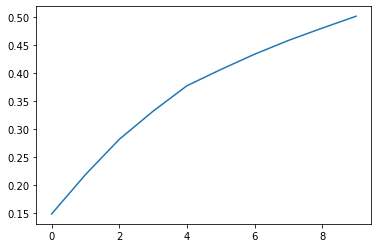

In [101]:
# Plot the explainability power
var_exp_cumsum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(var_exp_cumsum)

In [102]:
df_pca_model = pd.DataFrame(pca_model.explained_variance_ratio_,index=[1,2,3,4,5,6,7,8,9,10])
df_pca_model_pca = pd.DataFrame(Path_combined_pca)
df_pca_model_pca.columns=['Path_PCA1','Path_PCA2','Path_PCA3','Path_PCA4','Path_PCA5','Path_PCA6','Path_PCA7','Path_PCA8','Path_PCA9','Path_PCA10']
df_pca_model_pca

,Path_PCA1,Path_PCA2,Path_PCA3,Path_PCA4,Path_PCA5,Path_PCA6,Path_PCA7,Path_PCA8,Path_PCA9,Path_PCA10
0,-0.357445,-0.226317,-0.206012,-0.243638,-0.358820,-0.075733,-0.120053,-0.199738,-0.201889,-0.289594
1,-0.357479,-0.226392,-0.206101,-0.243952,-0.355643,-0.074246,-0.120040,-0.199339,-0.201797,-0.289587
2,-0.367263,-0.239810,-0.219843,-0.264755,-0.387530,-0.085023,-0.140099,-0.236962,-0.245464,-0.355251
3,-0.357436,-0.226299,-0.205990,-0.243560,-0.359614,-0.076105,-0.120056,-0.199837,-0.201913,-0.289596
4,-0.362375,-0.236862,-0.218620,-0.288161,0.092286,0.135405,-0.118199,-0.143115,-0.188715,-0.288565
...,...,...,...,...,...,...,...,...,...,...
312,1.213533,75.275795,2.045750,-0.843437,0.614455,0.061159,0.087973,0.131870,0.148371,0.061367
313,109.114056,-1.086780,-0.849965,0.145328,0.167163,0.023791,0.036377,0.057504,0.056515,0.083475
314,-0.367156,-0.239574,-0.219559,-0.263735,-0.397962,-0.090182,-0.140144,-0.238385,-0.245803,-0.355278
315,1.235713,2.378991,-0.217380,-0.380960,-0.479807,-0.142010,-0.235484,-0.449422,-0.535118,-0.868675


In [103]:
# Merge the pca dataframe with the campaign name
Path_combined_data_name=Path_combined_data_name.reset_index(drop=True)
df_pca_model_pca=pd.concat([Path_combined_data_name,df_pca_model_pca],axis=1)
df_pca_model_pca

,Campaign,Path_PCA1,Path_PCA2,Path_PCA3,Path_PCA4,Path_PCA5,Path_PCA6,Path_PCA7,Path_PCA8,Path_PCA9,Path_PCA10
0,4x4 Insurance,-0.357445,-0.226317,-0.206012,-0.243638,-0.358820,-0.075733,-0.120053,-0.199738,-0.201889,-0.289594
1,4x4 Insurance - Broad,-0.357479,-0.226392,-0.206101,-0.243952,-0.355643,-0.074246,-0.120040,-0.199339,-0.201797,-0.289587
2,4x4 Insurance - Exact,-0.367263,-0.239810,-0.219843,-0.264755,-0.387530,-0.085023,-0.140099,-0.236962,-0.245464,-0.355251
3,4x4 Insurance - Phrase,-0.357436,-0.226299,-0.205990,-0.243560,-0.359614,-0.076105,-0.120056,-0.199837,-0.201913,-0.289596
4,Bike Insurance,-0.362375,-0.236862,-0.218620,-0.288161,0.092286,0.135405,-0.118199,-0.143115,-0.188715,-0.288565
...,...,...,...,...,...,...,...,...,...,...,...
312,novi.digital - SEO - Generic - Region Targeted,1.213533,75.275795,2.045750,-0.843437,0.614455,0.061159,0.087973,0.131870,0.148371,0.061367
313,novi.digital - SEO - Region Keyword Targeted,109.114056,-1.086780,-0.849965,0.145328,0.167163,0.023791,0.036377,0.057504,0.056515,0.083475
314,novi.digital - Search Engine Marketing - Gener...,-0.367156,-0.239574,-0.219559,-0.263735,-0.397962,-0.090182,-0.140144,-0.238385,-0.245803,-0.355278
315,novi.digital - Search Engine Optimisation - Ge...,1.235713,2.378991,-0.217380,-0.380960,-0.479807,-0.142010,-0.235484,-0.449422,-0.535118,-0.868675


In [104]:
# Merge the result to the dataset.
data=pd.merge(data,df_pca_model_pca,on='Campaign') 
data

,Account,Campaign,Responsive_Search_Ad_description_4,Display_URL,Ad,Path_1,Path_2,Search_keyword_match_type,Start_date,End_Date,...,Path_PCA1,Path_PCA2,Path_PCA3,Path_PCA4,Path_PCA5,Path_PCA6,Path_PCA7,Path_PCA8,Path_PCA9,Path_PCA10
0,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,commercial,energy,Broad,2019-02-26,--,...,-0.376859,-0.255496,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666
1,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,commercial,electricity,Broad,2019-02-26,--,...,-0.376859,-0.255496,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666
2,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,commercial,electricity,Broad,2019-02-26,--,...,-0.376859,-0.255496,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666
3,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,business-energy,switch,Broad,2019-02-26,--,...,-0.376859,-0.255496,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666
4,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),--,NaN,NaN,business,gas-&-electric,Broad,2019-02-26,--,...,-0.376859,-0.255496,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47288,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.357427,-0.226280,-0.205968,-0.243481,-0.360408,-0.076476,-0.120059,-0.199937,-0.201936,-0.289598
47289,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.357427,-0.226280,-0.205968,-0.243481,-0.360408,-0.076476,-0.120059,-0.199937,-0.201936,-0.289598
47290,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.357427,-0.226280,-0.205968,-0.243481,-0.360408,-0.076476,-0.120059,-0.199937,-0.201936,-0.289598
47291,Insuro,Surgery Insurance - Phrase,--,Insuro.co.uk/Surgery-Insurance,{KeyWord:Surgery Insurance},--,--,Phrase,2014-04-08,--,...,-0.357427,-0.226280,-0.205968,-0.243481,-0.360408,-0.076476,-0.120059,-0.199937,-0.201936,-0.289598


In [105]:
# drop the path information from the dataset
# Cause the description column includes the text, which cannot be recognise in the modelling.
data = data.drop(columns=["Path_combined","Path_1","Path_2"])

In [106]:
# drop the path information from the dataset
# Cause the description column includes the text, which cannot be recognise in the modelling.
data = data.drop(columns=["Campaign"])

## Search_keyword_match_type

In [107]:
data['Search_keyword_match_type'].value_counts()

Broad     22521
Exact     17171
Phrase     7600
Name: Search_keyword_match_type, dtype: int64

In [108]:
# Create the dummy variables for the match type
data = pd.get_dummies(data, columns=['Search_keyword_match_type'], prefix='Search_keyword_match_type', drop_first=True)
# The first one is the base.

## Data cleaning

In [109]:
# Transfer the False and True to 0 and 1
data.replace(to_replace=False, value=0, inplace=True)
data.replace(to_replace=True, value=1, inplace=True)

In [110]:
# Drop the data without conv.rate
data = data.dropna(subset=["Conv._rate"])
data = data.dropna(subset=["number_in_search_keyword"])

In [111]:
# Del the variables which have over 50% missing values

In [112]:
data.columns

Index(['Account', 'Responsive_Search_Ad_description_4', 'Display_URL', 'Ad',
       'Start_date', 'End_Date', 'Impressions', 'Clicks', 'Cost', 'Avg._Cost',
       'CTR', 'Conversions', 'Cost_/_conv.', 'Conv._rate', 'start_weekday',
       'start_week', 'Search_keyword_len', 'keywords_with_company',
       'number_in_search_keyword', 'cta_in_search_keyword',
       'interrogative_in_search_keyword', 'headline_all_combined_len',
       'headline_with_company', 'headline_with_keywords_times',
       'number_in_headline', 'cta_in_headline', 'interrogative_in_headline',
       'description_all_combined_len', 'desciption_with_keywords_times',
       'description_with_company', 'number_in_description',
       'CTA_in_description', 'interrogative_in_description',
       'success_Conversions', 'start_month_2', 'start_month_3',
       'start_month_4', 'start_month_5', 'start_month_6', 'start_month_7',
       'start_month_8', 'start_month_9', 'start_month_10', 'start_month_11',
       'start_mont

In [113]:
# drop the path information from the dataset
# Cause the description column includes the text, which cannot be recognise in the modelling.
final_data = data.drop(columns=["Account",'Responsive_Search_Ad_description_4','Display_URL', 'Ad',
       'Start_date', 'End_Date','Cost_/_conv.','start_weekday','start_week','Cost','Conversions','Day_PCA3'
       ,'Day_PCA7',"Impressions",'Clicks','CTR','Cost_/_conv.', 'Conv._rate'])

In [114]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47293 entries, 0 to 47292
Data columns (total 55 columns):
Avg._Cost                           47293 non-null float64
Search_keyword_len                  47293 non-null int64
keywords_with_company               47293 non-null int64
number_in_search_keyword            47293 non-null float64
cta_in_search_keyword               47293 non-null int64
interrogative_in_search_keyword     47293 non-null int64
headline_all_combined_len           47293 non-null int64
headline_with_company               47293 non-null int64
headline_with_keywords_times        47293 non-null int64
number_in_headline                  47293 non-null float64
cta_in_headline                     47293 non-null int64
interrogative_in_headline           47293 non-null int64
description_all_combined_len        47293 non-null int64
desciption_with_keywords_times      47293 non-null int64
description_with_company            47293 non-null int64
number_in_description         

In [115]:
# Check for multicollinearity
c = final_data.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:50]

[(('headline_all_combined_len', 'description_all_combined_len'),
  0.8824369390633595),
 (('description_all_combined_len', 'headline_all_combined_len'),
  0.8824369390633595),
 (('start_month_8', 'weekday_en_Wed'), 0.8816025120326195),
 (('weekday_en_Wed', 'start_month_8'), 0.8816025120326195),
 (('Day_PCA4', 'Path_PCA5'), 0.8753692247905882),
 (('Path_PCA5', 'Day_PCA4'), 0.8753692247905882),
 (('Day_PCA4', 'Day_PCA5'), 0.8499957918112861),
 (('Day_PCA5', 'Day_PCA4'), 0.8499957918112861),
 (('Day_PCA2', 'Path_PCA5'), 0.8463283548970754),
 (('Path_PCA5', 'Day_PCA2'), 0.8463283548970754),
 (('start_month_7', 'Day_PCA4'), 0.8450085449385503),
 (('Day_PCA4', 'start_month_7'), 0.8450085449385503),
 (('start_month_9', 'weekday_en_Sat'), 0.8445864046734372),
 (('weekday_en_Sat', 'start_month_9'), 0.8445864046734372),
 (('Day_PCA5', 'Path_PCA5'), 0.8440421468492582),
 (('Path_PCA5', 'Day_PCA5'), 0.8440421468492582),
 (('start_month_7', 'weekday_en_Sun'), 0.8394668363576953),
 (('weekday_en_Sun

## Class balance

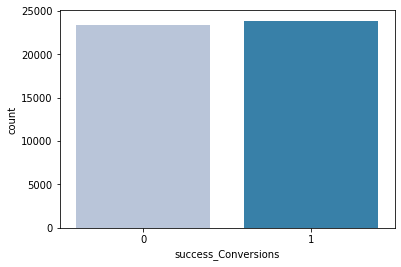

In [116]:
# Calculate the number of successful and unsuccessful 
final_data['success_Conversions'].value_counts()
log_hour=sns.countplot(x="success_Conversions",data=final_data,palette="PuBu")

In [117]:
final_data['success_Conversions'].value_counts()

1    23860
0    23433
Name: success_Conversions, dtype: int64

## Standardize the data

In [118]:
final_data.head()

,Avg._Cost,Search_keyword_len,keywords_with_company,number_in_search_keyword,cta_in_search_keyword,interrogative_in_search_keyword,headline_all_combined_len,headline_with_company,headline_with_keywords_times,number_in_headline,...,Path_PCA3,Path_PCA4,Path_PCA5,Path_PCA6,Path_PCA7,Path_PCA8,Path_PCA9,Path_PCA10,Search_keyword_match_type_Exact,Search_keyword_match_type_Phrase
0,6.08,1,0,0.0,0,0,20,1,0,0.0,...,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666,0,0
1,11.57,1,0,0.0,0,0,20,1,1,0.0,...,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666,0,0
2,2.59,1,0,0.0,0,0,20,1,1,0.0,...,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666,0,0
3,12.70,1,0,0.0,0,0,21,1,1,0.0,...,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666,0,0
4,8.70,1,0,0.0,0,0,20,1,0,0.0,...,-0.236645,-0.293171,-0.443843,-0.119008,-0.214879,-0.504749,2.221621,0.476666,0,0


In [119]:
final_data.columns

Index(['Avg._Cost', 'Search_keyword_len', 'keywords_with_company',
       'number_in_search_keyword', 'cta_in_search_keyword',
       'interrogative_in_search_keyword', 'headline_all_combined_len',
       'headline_with_company', 'headline_with_keywords_times',
       'number_in_headline', 'cta_in_headline', 'interrogative_in_headline',
       'description_all_combined_len', 'desciption_with_keywords_times',
       'description_with_company', 'number_in_description',
       'CTA_in_description', 'interrogative_in_description',
       'success_Conversions', 'start_month_2', 'start_month_3',
       'start_month_4', 'start_month_5', 'start_month_6', 'start_month_7',
       'start_month_8', 'start_month_9', 'start_month_10', 'start_month_11',
       'start_month_12', 'weekday_en_Sat', 'weekday_en_Sun', 'weekday_en_Thu',
       'weekday_en_Tue', 'weekday_en_Wed', 'Day_PCA1', 'Day_PCA2', 'Day_PCA4',
       'Day_PCA5', 'Day_PCA6', 'Day_PCA8', 'Day_PCA9', 'Day_PCA10',
       'Path_PCA1', 'Path

In [120]:
Need_scale=['Avg._Cost', 'Search_keyword_len','headline_with_keywords_times','description_all_combined_len', 
            'desciption_with_keywords_times','Day_PCA1', 'Day_PCA2', 'Day_PCA4',
       'Day_PCA5', 'Day_PCA6', 'Day_PCA8', 'Day_PCA9', 'Day_PCA10',
       'Path_PCA1', 'Path_PCA2', 'Path_PCA3', 'Path_PCA4', 'Path_PCA5',
       'Path_PCA6', 'Path_PCA7', 'Path_PCA8', 'Path_PCA9', 'Path_PCA10']

In [121]:
numerical_data = final_data.loc[:,Need_scale]

In [122]:
final_data=final_data.drop(columns=Need_scale)

In [123]:
# Scale the data
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit the data on the scaler object
scaled_df = scaler.fit_transform(numerical_data)
final_data = pd.concat([final_data,numerical_data],axis=1)

In [127]:
# Return the sum of missing values across columns in the dataframe
def missing_data(final_data):
    total = final_data.isnull().sum().sort_values(ascending=False)
    percent = (final_data.isnull().sum()/final_data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(20))
missing_data(final_data)

,Total,Percent
Path_PCA10,0,0.0
success_Conversions,0,0.0
start_month_12,0,0.0
start_month_11,0,0.0
start_month_10,0,0.0
start_month_9,0,0.0
start_month_8,0,0.0
start_month_7,0,0.0
start_month_6,0,0.0
start_month_5,0,0.0


## Model Selection-machine learning

In [167]:
# Create the x_train/testing and y_train/testing dataset
# Split into train and validation set
from sklearn.model_selection import train_test_split
x = final_data.drop(['success_Conversions'], axis=1)
y = final_data.loc[:, ['success_Conversions']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [133]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [134]:
#Create a set of classifiers consisting of 9 sklearn algorithms
np.random.seed(15)

#Create a set of classifiers consisting of 9 sklearn algorithms
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(), 
    SVC(),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=200),
    AdaBoostClassifier(),
    BaggingClassifier(),
    LinearDiscriminantAnalysis()]

In [135]:
# Print out the prediction result
results = list()

for clf in classifiers:
    name = clf.__class__.__name__
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    results.append((
        name, 
        scores.mean()*100, 
        scores.std()*100
    ))

    print(
        "Classifier {0} has an average classification accuracy of {1:.2f} ({2:.2f})".format(
            name, 
            scores.mean()*100, 
            scores.std()*100
        )    
    )

/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.

Classifier KNeighborsClassifier has an average classification accuracy of 64.72 (0.39)
Classifier DecisionTreeClassifier has an average classification accuracy of 60.40 (0.38)


/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Classifier RandomForestClassifier has an average classification accuracy of 63.37 (0.39)


/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will 

Classifier SVC has an average classification accuracy of 65.87 (0.49)


/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cat

Classifier LogisticRegression has an average classification accuracy of 64.94 (0.44)


/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vecto

Classifier GradientBoostingClassifier has an average classification accuracy of 67.86 (0.63)


/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Classifier AdaBoostClassifier has an average classification accuracy of 66.47 (0.54)


/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Classifier BaggingClassifier has an average classification accuracy of 62.94 (0.54)


/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

Classifier LinearDiscriminantAnalysis has an average classification accuracy of 65.03 (0.47)


[64.72484958670907, 60.40333912283329, 63.3742126596204, 65.8693208587827, 64.93894790117264, 67.86223980393183, 66.46666359952073, 62.940743543946, 65.03409894256475]


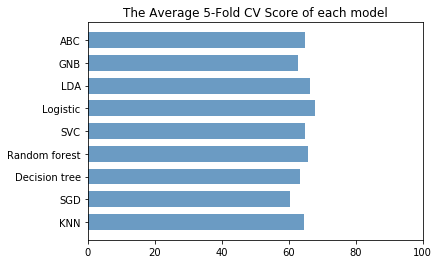

In [190]:
# Get the cross-validation score automatically
counts=list()
for i in results:
    counts.append(i[-2])
print(counts)
# Plot the score of each model
plt.barh(range(9), counts, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(9), [ 'KNN','SGD', 'Decision tree','Random forest','SVC','Logistic','LDA','GNB','ABC'])
plt.xlim(0,100)
plt.title("The Average 5-Fold CV Score of each model")
plt.show()

## Tuning hyperparameters

Choose the best model and tuning hyperparameters

GradientBoostingClassifier

In [175]:
# baseline model
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train, y_train.values.ravel())
clf.score(x_test, y_test)

0.672058357120203

In [183]:
# grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'subsample':[0.5, 0.8, 1], 'max_depth':[3, 5,10]}
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(x_train, y_train.values.ravel())

/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=6,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [184]:
# best parameters
best_parameters = grid_search.best_estimator_.get_params()
for para, val in list(best_parameters.items()):
    print(para, val)

criterion friedman_mse
init None
learning_rate 0.1
loss deviance
max_depth 5
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_impurity_split None
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
n_estimators 100
n_iter_no_change None
presort auto
random_state 0
subsample 0.8
tol 0.0001
validation_fraction 0.1
verbose 0
warm_start False


In [187]:
clf = GradientBoostingClassifier(max_depth=5, subsample=0.8, random_state=0)
clf.fit(x_train, y_train.values.ravel())
clf.score(x_test, y_test)

0.6763928533671636

In [188]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

gbm1 = GradientBoostingClassifier(n_estimators=100, random_state=0, subsample=0.8, max_depth=5,
                                  min_samples_split=2)
gbm1.fit(x_train, y_train)
train_new_feature = gbm1.apply(x_train)
train_new_feature = train_new_feature.reshape(-1, 50)

enc = OneHotEncoder()

enc.fit(train_new_feature)

print('The maximum number of values for each feature:', enc.n_values_)
print('The sum of the values of all the features:', enc.n_values_.sum())

train_new_feature2 = np.array(enc.transform(train_new_feature).toarray())

/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:100: DeprecationWarning: The ``n

The maximum number of values for each feature: [63 63 63 61 63 63 63 63 63 63 63 59 63 63 63 63 63 63 63 63 63 61 63 63
 59 61 61 63 63 63 63 61 61 49 63 63 63 63 55 63 63 61 63 63 61 61 63 63
 61 63]
The sum of the values of all the features: 3100


In [189]:
scores = cross_val_score(gbm1, x_train, y_train, cv=5)
print(scores)

/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cathy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vecto

[0.67891121 0.67521142 0.68146973 0.68913561 0.67301084]


## Confusion Matrix

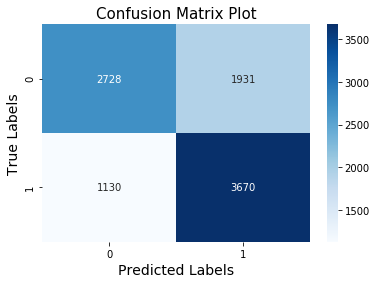

In [198]:
# Plot confusion matrix
y_pred=gbm1.predict(x_test)
cf_mat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_mat)
plt.figure(figsize = (6,4))
plt.title('Confusion Matrix Plot',fontsize=15)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicted Labels',fontsize=14)
plt.ylabel('True Labels',fontsize=14)
c, g = plt.ylim() # discover the values for bottom and top
c += 0.5 # Adding 0.5 to the bottom
g -= 0.5 # Subtracting 0.5 from the top
plt.ylim(c, g) # Updating the ylim(bottom, top) values
plt.show()

In [199]:
# Confusion matrix calculations
precision_recall=precision_recall_fscore_support(y_test,y_pred,average="binary")
print("The precision is:",round(precision_recall[0],2))
print("The recall is:",round(precision_recall[1],2))

The precision is: 0.66
The recall is: 0.76


In [148]:
# Import the related library
from sklearn.metrics import roc_curve, auc

In [149]:
# Tuning the model
from sklearn import metrics
y_proba = gbm1.predict_proba(x_test)
y_score = [x[1] for x in y_proba]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_data = [fpr,tpr,thresholds]

In [150]:
from sklearn.metrics import roc_curve, auc

In [154]:
from sklearn import metrics
y_proba = gbm1.predict_proba(x_test)
y_score = [x[1] for x in y_proba]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_data = [fpr,tpr,thresholds]

<Figure size 432x288 with 0 Axes>

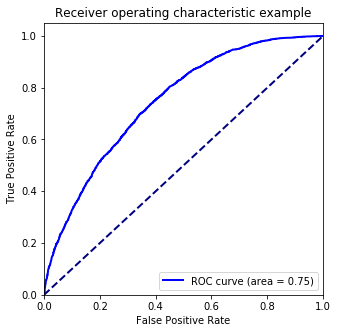

In [201]:
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [202]:
# AUC calculations
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.675


In [136]:
# Get the features' name
features=final_data.columns

In [212]:
# Calculate the features' importance
important_features = {feature:importance for feature,importance in zip(features, gbm1.feature_importances_)}
important_features = sorted(important_features.items(),key = lambda x: x[1],  reverse=True)
important_features

[('Search_keyword_match_type_Phrase', 0.20308531319572976),
 ('Path_PCA3', 0.16989986899727647),
 ('Path_PCA4', 0.14586853472854402),
 ('headline_with_keywords_times', 0.05620188071693163),
 ('Path_PCA5', 0.05148570787316763),
 ('headline_all_combined_len', 0.04029176053908879),
 ('Path_PCA9', 0.03680289636438338),
 ('Avg._Cost', 0.029462112035967825),
 ('Path_PCA7', 0.02021447630040773),
 ('Day_PCA1', 0.019483705432132778),
 ('Day_PCA10', 0.01864512516197386),
 ('number_in_headline', 0.01597554579429969),
 ('description_with_company', 0.015156146583646045),
 ('Day_PCA9', 0.014703535709361453),
 ('Path_PCA2', 0.014066238099847687),
 ('desciption_with_keywords_times', 0.01293691911056088),
 ('Day_PCA5', 0.012153367196410494),
 ('Day_PCA4', 0.011955414146049668),
 ('Day_PCA2', 0.011897467715556716),
 ('keywords_with_company', 0.00887137587689882),
 ('number_in_description', 0.008133518177825486),
 ('Day_PCA6', 0.008129578354564817),
 ('Path_PCA6', 0.00805917964980491),
 ('Path_PCA8', 0.0

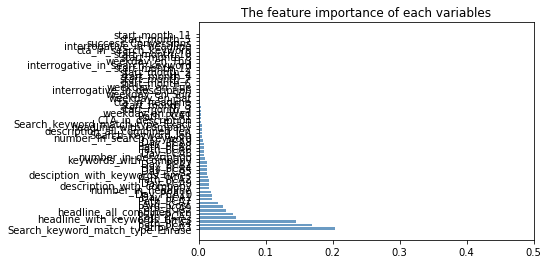

In [213]:
# Plot the feature importances of the Bagging
feature=dict(important_features)
y=list(feature.values())
x=list(feature.keys())
counts=y
plt.barh(range(len(x)), counts, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(x)), x)
plt.xlim(0,0.5)
plt.title("The feature importance of each variables")
plt.show()

In [ ]:
# Plot the feature importances of the Bagging
feature=dict(important_features)
y=list(feature.values())
x=list(feature.keys())
counts=y
plt.barh(range(len(x)), counts, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(x)), x)
plt.xlim(0,0.5)
plt.title("The feature importance of each variables")
plt.show()

In [204]:
#Try Lasso regression for shrinkage plot
from sklearn.linear_model import Lasso
lambda_list = np.logspace(-5.0, 5, num=100)

weights_lasso = []

for lambda_value in lambda_list:    
    lassoreg = Lasso(alpha=lambda_value)
    lassoreg.fit(x_train,y_train)
    weights_lasso.append(lassoreg.coef_) 

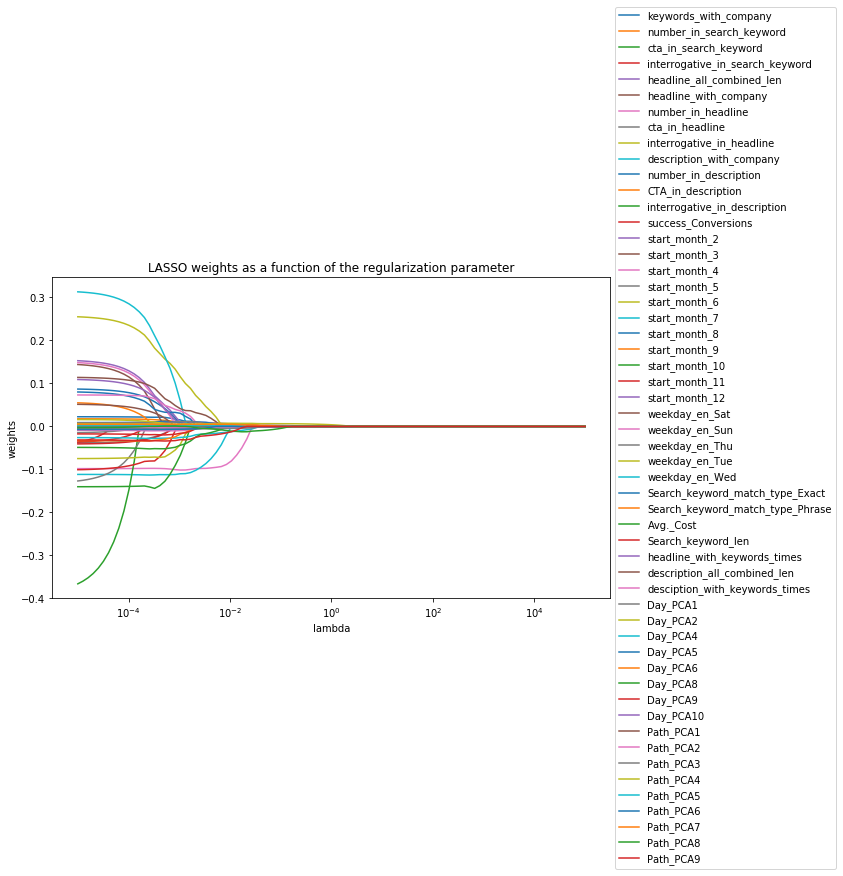

In [210]:
# Plot the result of lasso
X_colLabels=final_data.columns
fig = plt.figure(figsize = (10,13))
ax = fig.add_subplot(212)
ax.plot(lambda_list, weights_lasso)
ax.set_xscale('log')
ax.legend(labels = X_colLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('LASSO weights as a function of the regularization parameter')
plt.show()